# HITO INDIVIDUAL 1 : SISTEMAS DE GESTIÓN EMPRESARIAL
## Víctor Sánchez Grande

- Utilizando python descarga un archivo tipo excel con datos estadísticos del INE. Puedes elegir el tema que quieras, pero tiene que tener al menos 30
filas y 100 datos (las columnas deben ser años, meses o días)

In [1]:
# Enlace : https://www.ine.es/jaxiT3/files/t/es/xls/32449.xls?nocab=1

- Carga los datos en una variable y crea un dataset con ellos. Necesitarás el nombre de la hoja y la fila y columna en que están los nombres, también
deberás guardar los datos de las primeras celdas para los títulos de los gráficos (hasta que empiezan las columnas con los años – meses - días) y
luego eliminar esas filas para evitar errores.

In [24]:
import pandas as pd
from numpy import var
from statistics import mode
from matplotlib import pyplot as pp
import sqlite3
# Enlace : https://www.ine.es/jaxiT3/files/t/es/xls/32449.xls?nocab=1
excel_file = pd.ExcelFile('resources/file.xlsx')
dataframe = pd.read_excel(excel_file, sheet_name="tabla-32449")
columns = dataframe.columns

values

In [27]:
dataframe = dataframe.fillna(0)
dataframe = dataframe.replace({'..': 0})


def comprobar_valor_celdas():
    columnas = columns.delete(0)
    for c in columnas:
        c = str(c)
        for x in dataframe[c]:
            if x < 0:
                dataframe.replace({x: 0})
    print(dataframe)


comprobar_valor_celdas()


                                            Producción     2021       2020  \
0                                           Total CNAE  2134507  2015838.0   
1            A Agricultura, ganadería, silvicultura...    60816    60097.0   
2            A Agricultura, ganadería, silvicultura...    60816    60097.0   
3            01 Agricultura, ganadería, caza y serv...        0    56008.0   
4               02 Silvicultura y explotación forestal        0     1708.0   
..                                                 ...      ...        ...   
786                      96 Otros servicios personales        0     4475.0   
787          T Actividades de los hogares como empl...        0        0.0   
788          97-98 Actividades de los hogares como ...        0        0.0   
789          U Actividades de organizaciones y orga...        0        0.0   
790          99 Actividades de organizaciones y org...        0        0.0   

          2019       2018       2017       2016       2015     

- A partir del dataset, crea una colección de datos de cada tipo estudiado
utilizando una fila distinta.

In [11]:

def data_to_tupla(col):
    lista_silvicultura = []
    col = col.delete(0)
    for column in col:
        c = str(column)
        lista_silvicultura.append(("sector_silvicultura", c, dataframe[c][4]))

    return lista_silvicultura


def data_to_dic(col):
    dic_pesca = {}
    col = col.delete(0)
    for column in col:
        dic_pesca[column] = dataframe[column][1]
    return dic_pesca


print(data_to_tupla(columns))
print('\n')
print(data_to_dic(columns))

[('sector_silvicultura', '2021', '..'), ('sector_silvicultura', '2020', 1708.0), ('sector_silvicultura', '2019', 1741.0), ('sector_silvicultura', '2018', 1859.0), ('sector_silvicultura', '2017', 1834.0), ('sector_silvicultura', '2016', 1923.0), ('sector_silvicultura', '2015', 1856.0), ('sector_silvicultura', '2014', 1752.0), ('sector_silvicultura', '2013', 1740.0), ('sector_silvicultura', '2012', 1516.0), ('sector_silvicultura', '2011', 1571.0), ('sector_silvicultura', '2010', 1420.0), ('sector_silvicultura', '2009', 1351.0), ('sector_silvicultura', '2008', 1845.0), ('sector_silvicultura', '2007', 2134.0), ('sector_silvicultura', '2006', 2014.0), ('sector_silvicultura', '2005', 1908.0), ('sector_silvicultura', '2004', 1797.0), ('sector_silvicultura', '2003', 1770.0), ('sector_silvicultura', '2002', 1734.0), ('sector_silvicultura', '2001', 1570.0), ('sector_silvicultura', '2000', 1586.0), ('sector_silvicultura', '1999', 1312.0), ('sector_silvicultura', '1998', 1226.0), ('sector_silvicul

- Concatena todos los datos de la lista utilizando espacios entre medias y
guárdalo en un fichero de texto con el nombre “lista.txt”

In [15]:
def concat_and_save(nombre, data):
    file = open(nombre, "wt")
    for values in data:
        file.write(f"{values[1]}  {values[2]}\n")
    print("Fichero creado e info almacenada correctamente.")

concat_and_save("lista.txt", data_to_tupla(columns))

Fichero creado e info almacenada correctamente.


- Crea una función que cambie las filas por columnas para tener el dataset con
los años (meses o días) en las filas

In [34]:
dataframe2 = pd.read_excel(excel_file, sheet_name="tabla-32449")
cambio_filas_columnas = dataframe2.transpose()
print(cambio_filas_columnas)

                           0    \
Producción          Total CNAE   
2021                   2134507   
2020                 2015838.0   
2019                 2241847.0   
2018                 2156398.0   
2017                 2061054.0   
2016                 1953684.0   
2015                 1922923.0   
2014                 1870440.0   
2013                 1840171.0   
2012                 1886413.0   
2011                 1955501.0   
2010                 1963676.0   
2009                 1984954.0   
2008                 2175254.0   
2007                 2145676.0   
2006                 1998401.0   
2005                 1815864.0   
2004                 1653742.0   
2003                 1530031.0   
2002                 1428025.0   
2001                 1315287.0   
2000                 1210545.0   
1999                 1085506.0   
1998                 1000562.0   
1997                  931603.0   
1996                  870592.0   
1995                  815321.0   

             

- Crea una función que recorra las columnas y calcule la media, la varianza y la moda de cada una.

In [13]:
print(f"Media por año:\n{dataframe.mean(numeric_only=True)}")

print(f"Varianza por año:\n{dataframe.var(numeric_only=True)}")
def calcular_moda(col):
    for i in col:
        d = dataframe[i].tolist()
        print(f"Moda año {i} {mode(d)}")

calcular_moda(columns)

Media por año:
2020    28960.794643
2019    31944.934949
2018    30691.045918
2017    29416.650510
2016    28000.825255
2015    27462.114796
2014    26635.446429
2013    26260.970663
2012    26877.303571
2011    27903.505102
2010    28069.788265
2009    28368.960459
2008    30484.979592
2007    29708.659439
2006    27623.709184
2005    25218.553571
2004    23098.575255
2003    21443.625000
2002    20049.948980
2001    18546.503827
2000    17105.283163
1999    15442.017857
1998    14292.142857
1997    13331.304847
1996    12469.352041
1995    11705.318878
dtype: float64
Varianza por año:
2020    1.046957e+10
2019    1.290812e+10
2018    1.197506e+10
2017    1.096256e+10
2016    9.851289e+09
2015    9.529947e+09
2014    9.017685e+09
2013    8.751966e+09
2012    9.184267e+09
2011    9.888405e+09
2010    9.915899e+09
2009    1.010360e+10
2008    1.226242e+10
2007    1.203231e+10
2006    1.050084e+10
2005    8.670943e+09
2004    7.197771e+09
2003    6.172016e+09
2002    5.394503e+09
2001   

- Utiliza map para crear una función que haga algo con el dataset

In [14]:
def use_map(col):
    df = dataframe[col].map(lambda prod: prod*1.20).tolist()
    print(df)


use_map("2019")

[2690216.4, 69884.4, 69884.4, 64628.399999999994, 2089.2, 3166.7999999999997, 122938.79999999999, 7026.0, 7026.0, 77964.0, 77964.0, 37948.799999999996, 12655.199999999999, 25293.6, 642386.4, 642386.4, 150518.4, 23320.8, 9112.8, 16782.0, 7087.2, 45219.6, 48968.4, 19909.2, 25383.6, 24961.2, 36218.4, 45951.6, 6403.2, 21507.6, 26823.6, 82507.2, 21201.6, 13941.6, 16568.399999999998, 200719.19999999998, 200719.19999999998, 200719.19999999998, 610689.6, 300148.8, 40224.0, 155158.8, 104766.0, 153090.0, 66865.2, 3090.0, 16052.4, 60344.399999999994, 6738.0, 157450.8, 157450.8, 110804.4, 110804.4, 7106.4, 16161.599999999999, 37467.6, 50068.799999999996, 92043.59999999999, 92043.59999999999, 56476.799999999996, 21836.399999999998, 13730.4, 183184.8, 183184.8, 183184.8, 112688.4, 227821.19999999998, 127891.2, 57050.4, 32701.199999999997, 9880.8, 16788.0, 11470.8, 99930.0, 19624.8, 8734.8, 18045.6, 53524.799999999996, 329451.6, 110187.59999999999, 110187.59999999999, 81781.2, 81781.2, 137482.8, 1066

- Utilizar filter para crear una función que extraiga un sub-dataset

In [15]:
def values_greater_than_zero(col):
    df = dataframe[col]
    filt = filter(lambda prod: prod > 0, df)
    print(list(filt))


values_greater_than_zero("2020")

[2015838.0, 60097.0, 60097.0, 56008.0, 1708.0, 2381.0, 92794.0, 5114.0, 5114.0, 56093.0, 56093.0, 31587.0, 10643.0, 20944.0, 476509.0, 476509.0, 122347.0, 16769.0, 6967.0, 13030.0, 5019.0, 20433.0, 37089.0, 17457.0, 18992.0, 19122.0, 25285.0, 34114.0, 4893.0, 16099.0, 20601.0, 59647.0, 15581.0, 10534.0, 12530.0, 152705.0, 152705.0, 152705.0, 409376.0, 237684.0, 28825.0, 126126.0, 82733.0, 104361.0, 47347.0, 1976.0, 5418.0, 43882.0, 5738.0, 67331.0, 67331.0, 87879.0, 87879.0, 5372.0, 11611.0, 31892.0, 39004.0, 79165.0, 79165.0, 47468.0, 20004.0, 11693.0, 151097.0, 151097.0, 151097.0, 94420.0, 162700.0, 100219.0, 47022.0, 24423.0, 8767.0, 11316.0, 8691.0, 62481.0, 12600.0, 6374.0, 3971.0, 39536.0, 277599.0, 91966.0, 91966.0, 66942.0, 66942.0, 118691.0, 93204.0, 25487.0, 65917.0, 29420.0, 14719.0, 14701.0, 27503.0, 15507.0, 2462.0, 9534.0, 8994.0, 8994.0, 995773.0, 27998.0, 27998.0, 25850.0, 962.0, 1186.0, 52744.0, 2675.0, 2675.0, 31052.0, 31052.0, 19017.0, 5930.0, 13087.0, 353364.0, 3533

- Crea una clase que tenga como atributos las columnas

- Define una forma de imprimir los objetos de la clase en la que aparezcan
todos los datos de la clase

- Crea métodos para modificar el valor de cada atributo.

- Redefine los métodos especiales de comparación para poder comparar los objetos de la clase por el valor de la segunda columna y los de la suma y resta para que devuelvan el valor de la suma o resta de cada atributo.

In [21]:
class Data_table:
    def __init__(self, sector):
        self.sector = sector

    def __str__(self):
        sector = self.info()
        return f"{self.sector} ha producido un total por año de: {str(sector)}"

    def info(self):
        sectores = dataframe["Producción"].tolist()
        index = sectores.index(self.sector)
        columnas = columns.delete(0)
        tuple = []
        sector = {}
        for i in columnas:
            sector[str(i)] = dataframe[str(i)][index]
            tuple.append(dataframe[str(i)][index])
        return sector, tuple

    def __gt__(self, other):
        result, _ = self.info()
        if result.get("2021") > other:
            return -1

    def __eq__(self, other):
        result, _ = self.info()
        if result.get("2021") == other:
            return 0

    def __lt__(self, other):
        result, _ = self.info()
        if result.get("2021") < other:
            return 1

    def __add__(self, other):
        result, _ = self.info()
        return result.get("2021") + other

    def __sub__(self, other):
        result, _ = self.info()
        return result.get("2021") - other

- Crea un objeto de la clase para al menos cinco filas y prueba todos tus métodos.

In [23]:
pesca = Data_table("        03 Pesca y acuicultura")
manufacturera = Data_table("        C Industria manufacturera")
papel = Data_table("        17 Industria del papel")
pesca = Data_table("        A pesca, ganadería, silvicultura y pesca")
quimica = Data_table("        20 Industria química")

lista_sectores = [pesca, manufacturera, papel, pesca, quimica]
for ls in lista_sectores:
    inf, _ = ls.info()
    inf = inf.get("2021")
    print(ls.__gt__(inf))
    print(ls.__lt__(inf))
    print(ls.__eq__(inf))
    print(ls.__sub__(inf))
    print(ls.__add__(inf))
    print("-------------")

None
None
0


TypeError: unsupported operand type(s) for -: 'str' and 'str'

- Realiza gráficos anuales (mensuales o diarios) para cada columna, por grupos de dos columnas, tres columnas y todas las columnas juntas. Los gráficos
deben ser de distintos tipos.

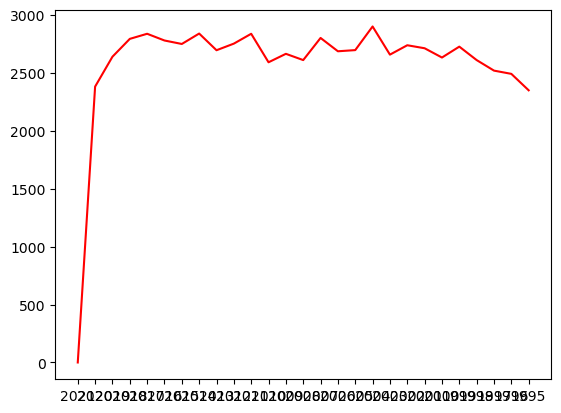

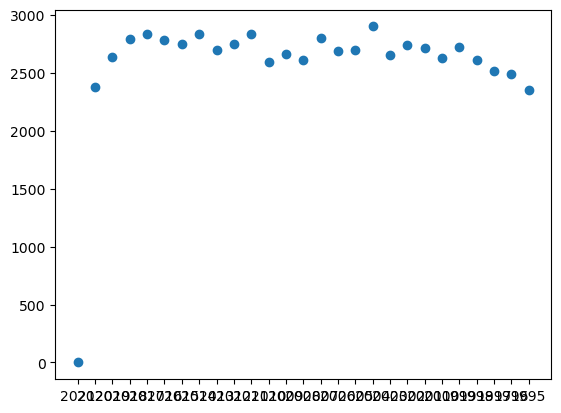

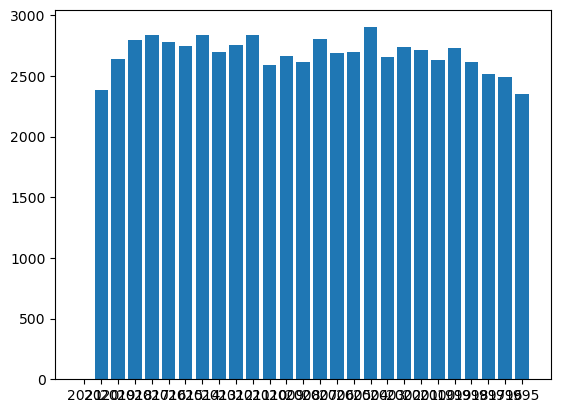

In [32]:
def converter(data):
    numbers = []
    for x in data:
        numbers.append(int(x))
    return numbers


fig, ax = pp.subplots()
_, ax2 = pp.subplots()
_, ax3 = pp.subplots()

years = columns.delete(0)
pesca = Data_table("        03 Pesca y acuicultura")
_, prod = pesca.info()
lista = converter(prod)
ax.plot(years, prod, color='red')
pp.savefig('grafico.png')
ax2.scatter(years, prod)
ax3.bar(years, prod)
pp.show()

- Crea una base de datos SQLite desde python

In [30]:
con = sqlite3.connect("produccion.db")

- Guarda el dataset como una tabla en la base de datos

In [31]:
table = dataframe.to_sql(name="Produccion", con=con)

- Realiza al menos tres consultas distintas

- Guarda el nuevo dataset como una nueva tabla en la base de datos

- Guarda el nuevo dataset como una nueva tabla en la base de datos.